## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [4]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [8]:
data = get_data(data_path='motorbike_ambulance_calls.csv')

In [9]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [10]:
data.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [11]:
data.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [12]:
data.shape

(17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** перевірте всі змінні на наявність пропусків.

In [14]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**


Ми здійснили огляд основної статистичної інформації для числових змінних, включаючи максимальні та мінімальні значення, а також розмірність нашого датасету. Це дозволило нам сформувати загальне уявлення про дані та їх потенційні властивості.

Ми провели аналіз типів даних та кількості даних для кожної змінної. Зауважили, що більшість атрибутів представлені числовими значеннями, що спрощує подальший аналіз, оскільки моделі машинного навчання краще опрацьовують числові дані.

Провели перевірку наявності пропущених значень в датасеті. Виявили, що пропусків немає, що дозволяє нам використовувати всі атрибути без необхідності видалення чи заміни даних.


**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [15]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  print(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]


C:\Users\apavl\AppData\Local\Temp\ipykernel_31800\1648367148.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [16]:
import pandas as pd

def get_time_limits(df: pd.DataFrame, date_col_name: str):
    try:
        first_day = df[date_col_name].min()
        last_day = df[date_col_name].max()
        print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")
    except KeyError:
        print(f"Error: Column '{date_col_name}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

data = pd.DataFrame({'date': ['2024-01-01', '2024-01-02', '2024-01-03']})
get_time_limits(data, 'date')


First day of dataset - 2024-01-01.
Last day of dataset - 2024-01-03


 Ми змінили тип даних змінної "date" з "object" на "datetime" і встановили часові межі датасету. Це дозволило нам переконатися, що дані, зібрані у наборі даних, насправді охоплюють період протягом двох років.


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [19]:
data_categorical = data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]

data_categorical

KeyError: "None of [Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',\n       'weathersit'],\n      dtype='object')] are in the [columns]"

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [21]:
def encode_season(df: pd.DataFrame, season_col_name: str, season_mapping: dict):
    try:
        df[season_col_name] = df[season_col_name].replace(season_mapping)
        return df
    except KeyError:
        print(f"Error: Column '{season_col_name}' not found in the DataFrame.")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

data = pd.DataFrame({'season': ['spring', 'summer', 'autumn', 'winter']})
season_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
data = encode_season(data, 'season', season_mapping)
print(data['season'].unique())


[1 2 3 4]


C:\Users\apavl\AppData\Local\Temp\ipykernel_31800\3341380685.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[season_col_name] = df[season_col_name].replace(season_mapping)


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

ValueError: Could not interpret value `variable1` for `x`. An entry with this name does not appear in `data`.

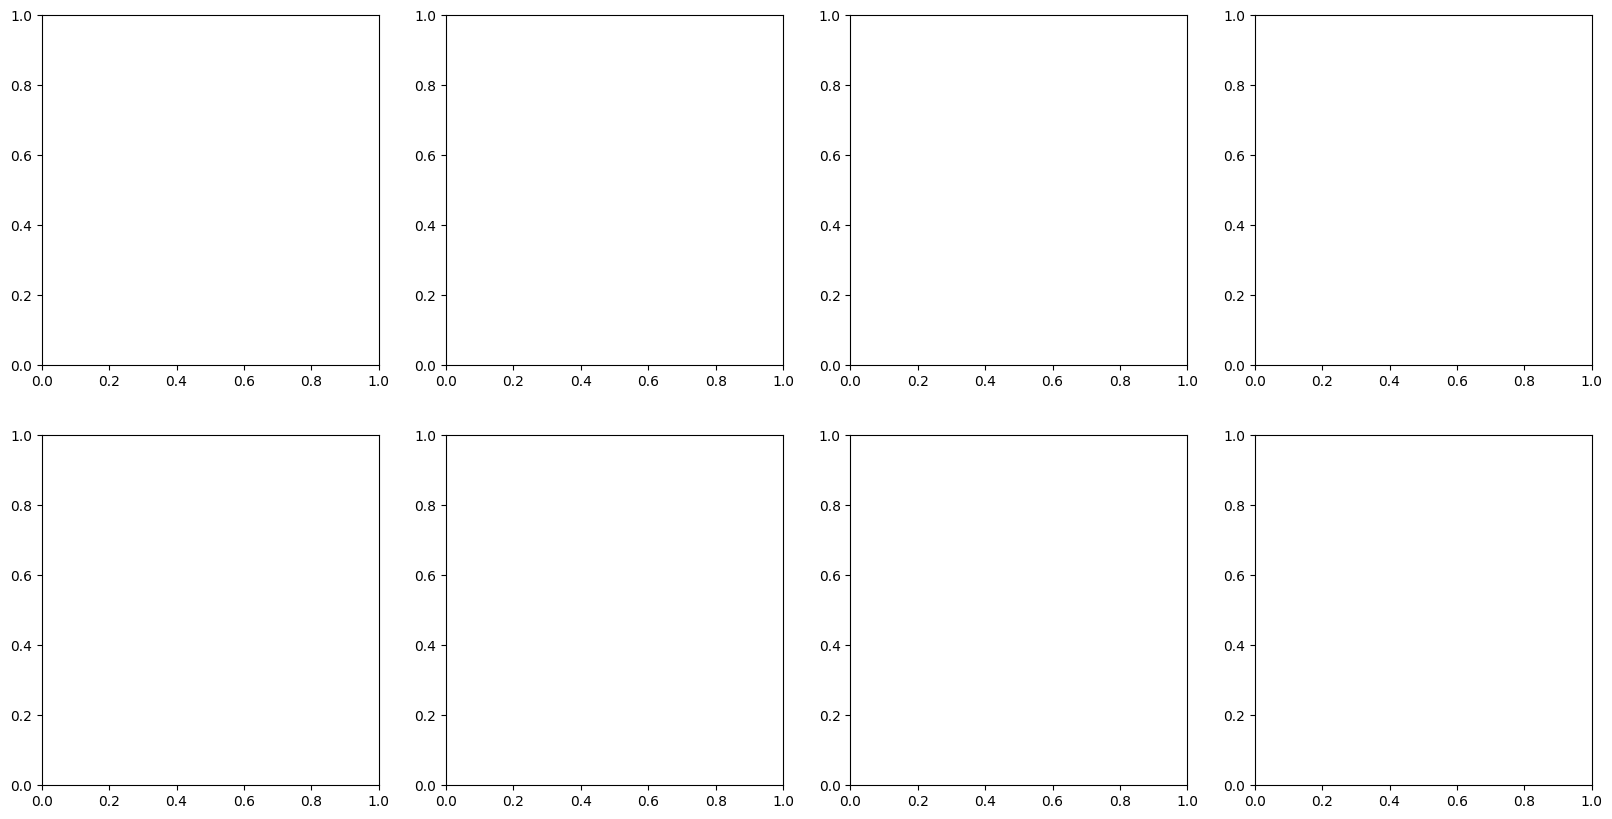

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable,data=data, ax=subplot)

plt.show()

**Висновки з 5-7 завдання (детальні)**



Ми створили окремий датасет для категоріальних змінних з метою збереження цих даних і для зручності подальшого аналізу.

Провели трансформацію змінної "Season", яка включає числові значення та категорії. Це полегшить аналіз, оскільки "Season" може мати важливий вплив на результати.

Побудували графіки для аналізу змінних і поки що не спостерігаємо якихось явних тенденцій чи закономірностей, що вказувало б на необхідність подальшого дослідження.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [25]:
data_numerical = data[['temp','hum','windspeed','atemp','cnt']]
data_numerical

KeyError: "None of [Index(['temp', 'hum', 'windspeed', 'atemp', 'cnt'], dtype='object')] are in the [columns]"

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

ValueError: Could not interpret value `variable1` for `x`. An entry with this name does not appear in `data`.

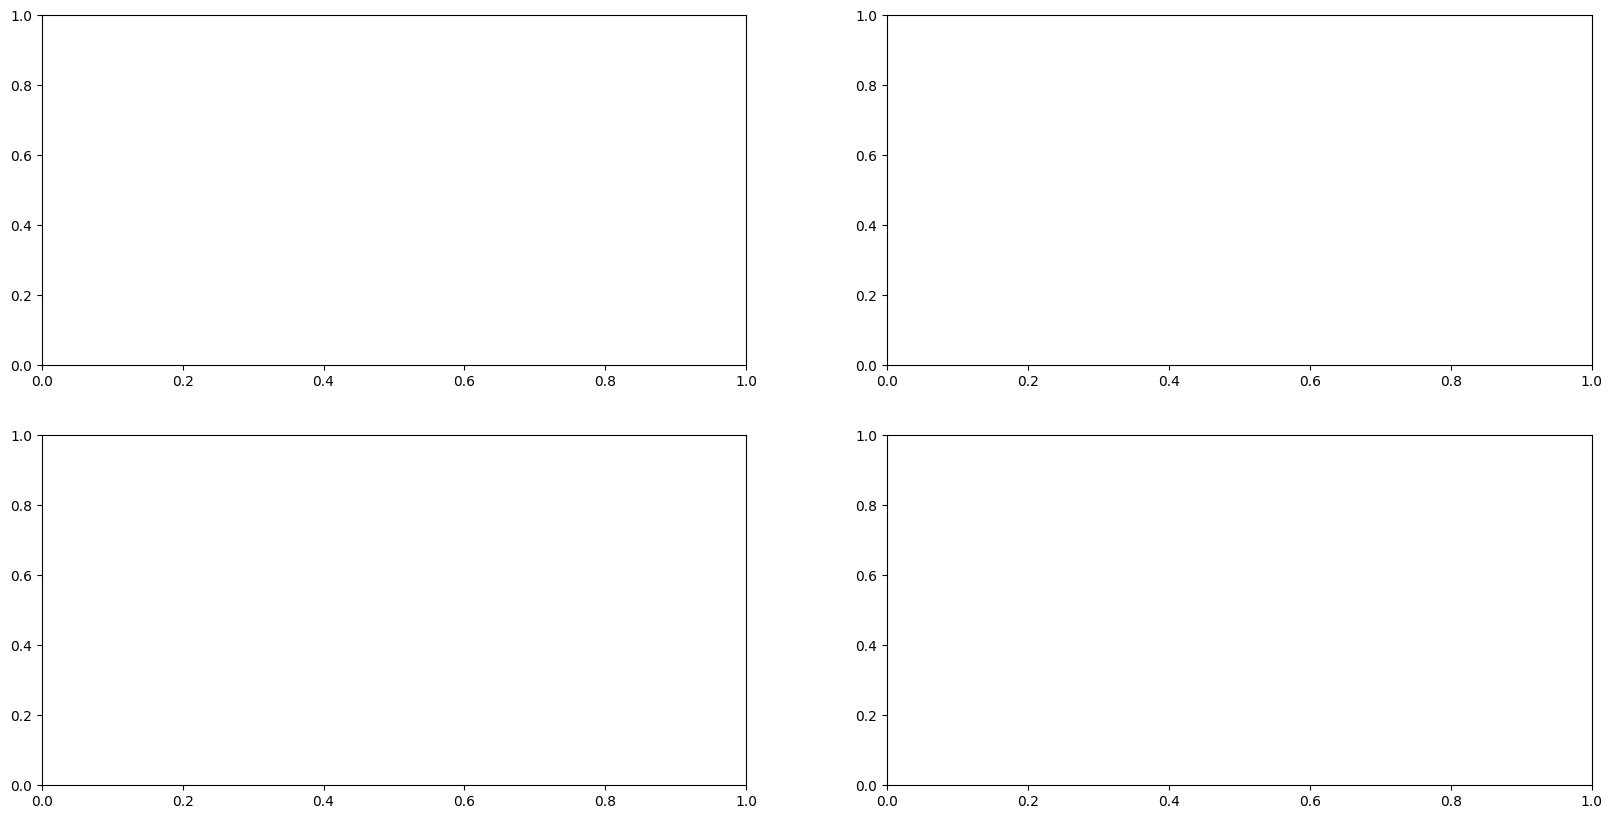

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x=variable,data=data, ax=subplot)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

In [28]:
def plot_and_get_skewness(data, column):
    sns.histplot(data[column])
    skewness_coefficient = data[column].skew()
    print("Skewness:", skewness_coefficient)
    plt.show()

plot_and_get_skewness(data, 'cnt')


KeyError: 'cnt'

**Висновки з 8-10 завдання (детальні)**



Виділення всіх числових змінних у окремий датасет дозволить нам здійснити аналіз цих змінних та зосередити увагу лише на числових даних, які будуть використовуватися у подальших аналітичних дослідженнях.

Спостерігаємо наявність експоненціальних та біноміальних розподілів у наших даних. Це надає нам додаткову інформацію про характер даних і дозволяє робити припущення для подальшого аналізу.

Коефіцієнт нахилу розподілу складає 1.2774116037490577, що більший за 0. Це означає, що більшість даних зосереджена ліворуч від середнього значення, а також вказує на наявність довгого хвоста, що тягнеться вправо. Це може свідчити про наявність викидів у даних, які можуть впливати на наші статистичні висновки.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatterplots(data, numerical_vars, target_var='cnt', subplot_shape=(2, 2), figsize=(15, 10)):
    fig, ax = plt.subplots(subplot_shape[0], subplot_shape[1], figsize=figsize)
    for var, subplot in zip(numerical_vars, ax.flatten()):
        sns.scatterplot(x=target_var, y=var, data=data, ax=subplot)
        subplot.set_title(f'{target_var} vs {var}')
        subplot.set_xlabel(target_var)
        subplot.set_ylabel(var)
    plt.tight_layout()
    plt.show()

data_numerical = data[['var1', 'var2', 'var3', 'var4']]
plot_scatterplots(data_numerical, data_numerical.columns.drop('cnt'))


KeyError: "None of [Index(['var1', 'var2', 'var3', 'var4'], dtype='object')] are in the [columns]"

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

ValueError: Could not interpret value `var1` for `x`. An entry with this name does not appear in `data`.

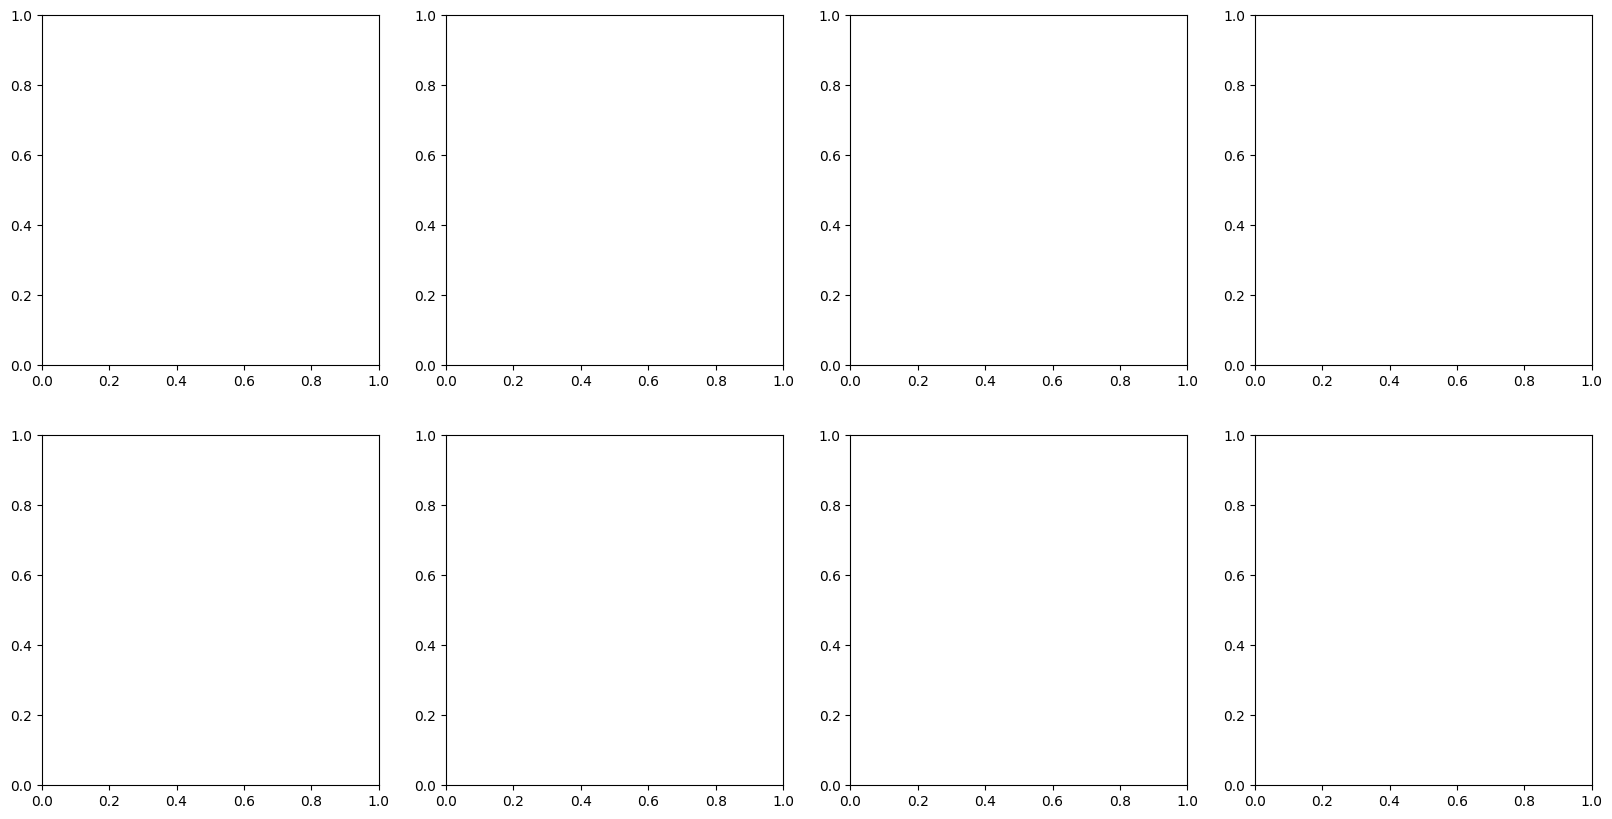

In [30]:
def plot_boxplots(data, categorical_vars, target_var='cnt', subplot_shape=(2, 4), figsize=(20, 10)):
    fig, ax = plt.subplots(subplot_shape[0], subplot_shape[1], figsize=figsize)
    for var, subplot in zip(categorical_vars, ax.flatten()):
        sns.boxplot(x=var, y=target_var, data=data, ax=subplot)
        subplot.set_title(f'{target_var} vs {var}')
        subplot.set_xlabel(var)
        subplot.set_ylabel(target_var)
    plt.tight_layout()
    plt.show()

data_categorical = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8']
plot_boxplots(data, data_categorical)


**Висновки з 11-12 завдання (детальні)**



Після аналізу графіків взаємозв'язку між числовими змінними та цільовою змінною cnt, виявлено певні закономірності. Наприклад, спостерігається позитивна залежність між cnt та temp, що логічно, оскільки вища температура сприяє більшій кількості викликів. Це пояснюється тим, що більше людей вибирають їзду на мотоциклі у тепліші періоди року, такі як літо та весна. Графік cnt та windspeed також вказує на пряму залежність, що може бути пов'язано з умовами погоди: при стабільному вітрі кількість викликів може залишатися сталою, а при надмірно високій швидкості вітру вона може зменшитися, вказуючи на несприятливі умови для їзди.

Аналіз boxplot-ів показує, що певні залежності спостерігаються в залежності від часу доби та дня тижня. Наприклад, кількість викликів зазвичай найбільша вранці під час руху на роботу, після чого зменшується вдень, а знову зростає ввечері після робочого дня. Щодо днів тижня, кількість викликів зазвичай стабільна кожного дня. Також помітно, що при кращих погодних умовах кількість викликів зазвичай більша, а при погіршенні погоди вона зменшується.




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

In [31]:

def plot_corr_heatmap(data, method='pearson', figsize=(15, 10), annot=True, cmap='Blues', center=0, linewidths=0.5, linecolor='black'):
    corr_coof = data.corr(method=method)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr_coof, annot=annot, cmap=cmap, center=center, linewidths=linewidths, linecolor=linecolor, ax=ax)
    ax.set_title(f"{method.capitalize()} Correlation Matrix")
    plt.show()

plot_corr_heatmap(data_numerical)
plot_corr_heatmap(data_numerical, method='spearman', cmap='coolwarm', linecolor='white')


AttributeError: 'list' object has no attribute 'corr'

In [69]:
print("Pearson correlation matrix:")
print(corr_coof_Pearson)
print("\nSpearman correlation matrix:")
print(corr_coof_Spearman)


print("\nThe Pearson correlation coefficient measures the linear relationship between two variables, while the Spearman correlation coefficient measures the monotonic relationship between two variables.")
print("Linear relationships are those where the relationship between variables can be described by a straight line, whereas monotonic relationships are those where the relationship between variables can be described by a straight line, but not necessarily a straight line.")
print("The Pearson correlation coefficient is sensitive to outliers, while the Spearman correlation coefficient is less sensitive to outliers.")

Pearson correlation matrix:
               temp       hum  windspeed     atemp       cnt
temp       1.000000 -0.069881  -0.023125  0.987672  0.404772
hum       -0.069881  1.000000  -0.290105 -0.051918 -0.322911
windspeed -0.023125 -0.290105   1.000000 -0.062336  0.093234
atemp      0.987672 -0.051918  -0.062336  1.000000  0.400929
cnt        0.404772 -0.322911   0.093234  0.400929  1.000000

Spearman correlation matrix:
               temp       hum  windspeed     atemp       cnt
temp       1.000000 -0.055408  -0.009719  0.989633  0.423330
hum       -0.055408  1.000000  -0.293913 -0.052617 -0.359614
windspeed -0.009719 -0.293913   1.000000 -0.041091  0.126629
atemp      0.989633 -0.052617  -0.041091  1.000000  0.423258
cnt        0.423330 -0.359614   0.126629  0.423258  1.000000

The Pearson correlation coefficient measures the linear relationship between two variables, while the Spearman correlation coefficient measures the monotonic relationship between two variables.
Linear relation

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [33]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season']),
                      pd.get_dummies(df['mnth']),
                      pd.get_dummies(df['weekday']),
                      pd.get_dummies(df['weathersit']),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [34]:
features = get_dummies(data)

KeyError: 'mnth'

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [35]:
features['night_hours'] = (data['hr'] >= 22) | (data['hr'] <= 5)
features = features.drop('hr', axis = 1)

KeyError: 'hr'

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [36]:
features_lr = features.drop(['atemp', 'date'], axis = 1)


NameError: name 'features' is not defined

In [37]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis = 1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [38]:
from sklearn.linear_model import LinearRegression

def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)


NameError: name 'X_train' is not defined

In [65]:
# predict
y_train_pred = model.predict(X_train)
X_test.columns = X_test.columns.astype(str)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15877.966, test: 15224.769
R^2 train: 0.525, test: 0.518


Оскільки наша модель містить багато незалежних змінних, ми не можемо відобразити їх вплив у двовимірному просторі. Проте ми можемо побудувати графік, який показує взаємозв'язок між залишками моделі та передбачуваними значеннями. Це допоможе нам оцінити якість моделі.

In [39]:
import matplotlib.pyplot as plt

def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, c='#5f93ad', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='#98c3d9', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
    plt.tight_layout()
    plt.show()

plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

NameError: name 'y_train_pred' is not defined

**Висновки з завдання (детальні)**



1.   За графіком бачимо що наша лінійна регресія працює. Training data буде давати більш точну оцінку ніж Test data.
2.   Після обчислень R^2 train можемо побачити що наша модель буде давати правильну оцінку в 52.5% випадках.
3.   Ми видалили date тому що воно не є необхідною для нашої моделі. А зміну atemp ми видаляємо через те що вона викликає мультиколінеарність з зміною temp. Видаляємо саме atemp тому що вона вказує не на фактичну темпертатуру, а по відчуттях людини, що є дуже суб'єктивною думкою, тому залишаємо фактичну температуру temp.


